In [1]:
#生产训练数据
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

def f_priority():
    pass


In [2]:
#读取一天的数据
day = '180418'
day_l = '20'+day

train_src = pd.read_csv('./train/ajob_train/ajob_train_%s.csv'%day,low_memory=False)
print(train_src.shape)

(240519, 29)


task_type
Command        205928
Dummy             573
Job             27218
SMART Table      6800
Name: task_type, dtype: int64


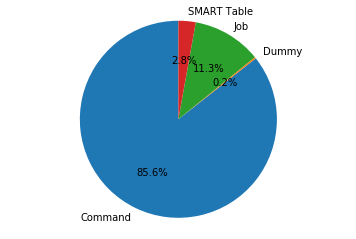

In [3]:
#做一些数可视化分析

#作业类型分析：
sizes = train_src.groupby(['task_type'])['task_type'].count()
print(sizes)
labels = sizes.index
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.show()

In [9]:
#不同作业执行平均时间
task_mean_runtime = train_src.groupby(['task_type'])['avg_runtime'].mean()
print(task_mean_runtime)

task_type
Command            68.011247
Dummy               0.111693
Job               198.253913
SMART Table    107994.052941
Name: avg_runtime, dtype: float64


In [ ]:
#end_time
def f_endtime(s):
    retrun 
end_t = train_src['end_time']
end_t = end_t.dropna()
train_src['end_time'] = train_src['end_time'].apply(str)
train_src['end_time'] = train_src['end_time'].apply(str)

4487 236032


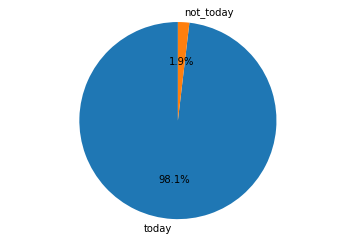

In [4]:
#是否是当天实例化的作业
day_int = int(day)
train_src['odate']=train_src['odate'].apply(int)
today = (train_src['odate']==day_int).apply(int).sum()
not_today = train_src.shape[0]-today
print(not_today,today)
labels = ['today','not_today']
plt.pie([today,not_today],labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.show()

priority
0a     36798
99      9693
AA      5322
ja      3229
oa         1
sa    185476
Name: priority, dtype: int64


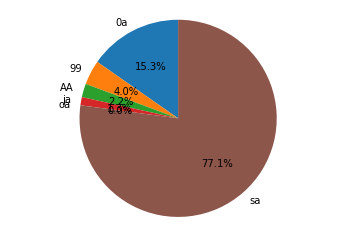

In [5]:
#作业优先级分类
sizes = train_src.groupby(['priority'])['priority'].count()
print(sizes)
labels = sizes.index
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.show()

In [6]:
sizes = train_src.groupby(['nodegroup'])['nodegroup'].count()
sizes = sizes.sort_values(0,ascending=False)
print(sizes)

nodegroup
GRP_DS_AGENT              109052
GRP_TD_AGENT               58517
GRP_FS_AGENT               44073
GRP_DB_AGENT               13003
10.2.3.26                   5167
GRP_OFB_AGENT               1101
10.2.2.242                   360
10.3.156.44                  311
GRP_RSM06_AGENT              188
GRP_RSM02_AGENT              188
GRP_RSM04_AGENT              185
GRP_RSM05_AGENT              185
GRP_RSM03_AGENT              185
GRP_DS_MT_AGENT              145
GRP_CRMAPP_AGENT             142
10.1.72.42                   118
GRP_RSN_AGENT                115
GRP_dxpsftp_AGENT            106
10.1.72.43                   104
ETLSERVERN1                   93
GRP_HDSSOMS01KF_AGENT         61
hdbkubc01u15p                 60
GRP_TDBSF_AGENT               39
ETLSERVERN2                   34
GRP_DB_AGENT_MT               28
10.1.72.44                    24
ETLSERVERN3                   19
DS08                          14
GRP_TDLSZ_AGENT               13
DQMSERVER01SZ                 11


nodegroup
GRP_DS_AGENT       109052
GRP_TD_AGENT        58517
GRP_FS_AGENT        44073
GRP_DB_AGENT        13003
10.2.3.26            5167
GRP_OFB_AGENT        1101
10.2.2.242            360
10.3.156.44           311
GRP_RSM06_AGENT       188
GRP_RSM02_AGENT       188
Name: nodegroup, dtype: int64


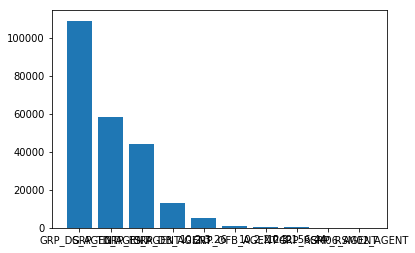

In [7]:
#作业运行节点组统计

sizes = train_src.groupby(['nodegroup'])['nodegroup'].count()
sizes = sizes.sort_values(0,ascending=False)[0:10]
print(sizes)
labels = sizes.index




plt.bar(range(len(sizes)),sizes,tick_label = labels)
plt.show()

nodegroup
GRP_DS_AGENT    109052
GRP_TD_AGENT     58517
GRP_FS_AGENT     44073
GRP_DB_AGENT     13003
10.2.3.26         5167
Name: nodegroup, dtype: int64


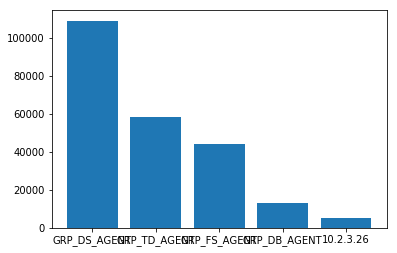

In [8]:
#作业运行节点组统计

sizes = train_src.groupby(['nodegroup'])['nodegroup'].count()
sizes = sizes.sort_values(0,ascending=False)[0:5]
print(sizes)
labels = sizes.index




plt.bar(range(len(sizes)),sizes,tick_label = labels)
plt.show()

In [33]:

#10点截取

day = '171211'
day_l = '20'+day

train_src = pd.read_csv('./train/ajob_train/ajob_train_%s.csv'%day,low_memory=False)
print(train_src.shape)

train_src['start_time'] = train_src['start_time'].fillna(-1)
train_src['start_time'] = train_src['start_time'].apply(int)

inter_10_time = int(day_l+'100000')
print(inter_10_time)


#print(train_src[train_src['start_time'] < inter_10_time]['start_time'])
train_src = train_src[train_src['start_time'] > inter_10_time]
train_src.reindex(range(len(train_src)))
print(train_src['start_time'].min())

train_gen = train_src[['order_id','job_name']]

train_gen['is_mt'] = (train_src['odate']==train_src['v_date']).apply(int)
train_gen[['task_type1','task_type2','task_type3','task_type4']] = pd.get_dummies(train_src['task_type'])


(206974, 29)
20171211100000
20171211100001


c:\program files\python3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
day = '171211'
day_l = '20'+day

train_src = pd.read_csv('./train/ajob_train/ajob_train_%s.csv'%day,low_memory=False)

train_src['start_time'] = train_src['start_time'].fillna(-1)

print(train_src['start_time'].apply(int)[:10])


0    20171211113024
1    20171211142105
2    20171211182014
3    20171211142007
4                -1
5                -1
6    20171211141516
7    20171211143107
8    20171211182123
9    20171211135507
Name: start_time, dtype: int64


In [5]:
import pandas as pd
def f_get_jobname_head(s):
    return s.split('_')[0]
train_src = pd.read_csv('pre_data.csv',low_memory=False)
print(train_src.shape)

(52168, 29)


In [16]:
train_src['job_name_head'] = train_src['job_name'].apply(f_get_jobname_head)
head_to10 = train_src.groupby(['job_name_head']).job_name_head.count()
print(head_to10.sort_values(0,ascending=False)[0:40])
print(head_to10.sort_values(0,ascending=False)[0:40].sum())

job_name_head
EXZ     10633
SYS      6264
FW       4179
LD       3562
EXM      3021
EX       2986
HEES     1903
STG      1444
DXP      1405
TRZ      1391
ARTP     1318
NDS      1298
RSM      1126
TS       1049
TDD       781
RF        719
SMS       543
AAML      507
RT        471
HS        464
TRM       413
TR        412
RDM       371
PDM       337
FS        307
ARTS      290
FR        274
ES        173
ESZ       172
ESM       170
BRTL      164
RU        157
ARTB      157
TBZ       149
TBM       149
TB        149
TN        147
ARTC      132
AMDS      128
CRS       119
Name: job_name_head, dtype: int64
49434


In [13]:
train_src['order_table_head'] = train_src['order_table'].apply(f_get_jobname_head)
head_to10 = train_src.groupby(['order_table_head']).job_name_head.count()
print(head_to10.sort_values(0,ascending=False)[0:25])
print(head_to10.sort_values(0,ascending=False)[0:25].sum())

order_table_head
DXP     33964
STG      2329
EES      2015
ARTP     1684
OUT      1423
LV62     1295
NDS      1251
TDD       787
OFB       657
SMS       552
AAML      527
LV24      402
PDM       357
ARTS      341
LV56      302
ARTC      275
AMDS      242
LN55      193
LV05      184
BRTL      184
ARTB      182
SYS       174
LN61      162
SUB       144
LF35      125
Name: job_name_head, dtype: int64
49751


In [17]:
#train_src['nodegroup_head'] = train_src['nodegroup'].apply(f_get_jobname_head)
head_to10 = train_src.groupby(['nodegroup']).nodegroup.count()
print(head_to10.sort_values(0,ascending=False))
print(head_to10.sort_values(0,ascending=False).sum())

nodegroup
GRP_DS_AGENT              29713
GRP_TD_AGENT               7627
GRP_FS_AGENT               6082
GRP_DB_AGENT               2976
10.2.3.26                  1903
GRP_OFB_AGENT               435
10.3.156.44                 248
10.2.2.242                  197
GRP_RSM06_AGENT             122
GRP_RSM02_AGENT             122
GRP_RSM03_AGENT             121
GRP_RSM04_AGENT             121
GRP_RSM05_AGENT             121
GRP_CRMAPP_AGENT             77
GRP_HDSSOMS01KF_AGENT        61
ETLSERVERN1                  59
hdbkubc01u15p                59
10.1.72.42                   32
10.1.72.43                   30
GRP_dxpsftp_AGENT            28
GRP_TDBSF_AGENT              28
ETLSERVERN3                  12
GRP_TDLSZ_AGENT              12
ETLSERVERN2                   8
etldbagent01sz                6
DS08                          6
GRP_APP1_MONITOR_AGENT        4
10.1.72.44                    4
EMSERVER1                     4
BI-ISERVER1SZ                 3
emserver1                     

In [18]:
print(head_to10.T.to_dict())

{'10.1.72.42': 32, '10.1.72.43': 30, '10.1.72.44': 4, '10.2.2.242': 197, '10.2.3.26': 1903, '10.3.156.44': 248, 'BI-ISERVER1SZ': 3, 'DS08': 6, 'EMSERVER1': 4, 'ETLSERVERN1': 59, 'ETLSERVERN2': 8, 'ETLSERVERN3': 12, 'GRP_APP1_MONITOR_AGENT': 4, 'GRP_CRMAPP_AGENT': 77, 'GRP_DB_AGENT': 2976, 'GRP_DS_AGENT': 29713, 'GRP_DS_MT_AGENT': 2, 'GRP_FS_AGENT': 6082, 'GRP_HDSSOMS01KF_AGENT': 61, 'GRP_OFB_AGENT': 435, 'GRP_RCM_AGENT': 2, 'GRP_RSM02_AGENT': 122, 'GRP_RSM03_AGENT': 121, 'GRP_RSM04_AGENT': 121, 'GRP_RSM05_AGENT': 121, 'GRP_RSM06_AGENT': 122, 'GRP_RSN_AGENT': 2, 'GRP_TDBSF_AGENT': 28, 'GRP_TDLSZ_AGENT': 12, 'GRP_TD_AGENT': 7627, 'GRP_dxpsftp_AGENT': 28, 'ds01': 3, 'ds02': 3, 'ds03': 3, 'ds04': 3, 'ds05': 3, 'ds06': 3, 'ds07': 3, 'ds08': 3, 'emserver1': 3, 'etldbagent01sz': 6, 'etldbagent02sz': 1, 'etldbagent04sz': 1, 'hadoop-cbs': 1, 'hdbkubc01u15p': 59}
